In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
# modeling 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


## Importing dataset 

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X = df.drop(columns=['math_score'],axis=1)#here I m droping the mathscore

In [4]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [5]:
# create tranformer with 3 type of transformers
num_feature = X.select_dtypes(exclude="object").columns
cat_feature = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprosesor= ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_feature),
        ("StandardScalar",numeric_transformer,num_feature),
    ]
)



In [6]:
X = preprosesor.fit_transform(X)

In [7]:
X.shape

(1000, 19)

# train test split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45)
x_train.shape, x_test.shape

((800, 19), (200, 19))

## Create an Evaluate Function to give all a metrics after model training 

In [11]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3276
- Mean Absolute Error: 4.2274
- R2 Score: 0.8785
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3885
- Mean Absolute Error: 4.3428
- R2 Score: 0.8623


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5511
- Mean Absolute Error: 5.1433
- R2 Score: 0.8162
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4711
- Mean Absolute Error: 5.2436
- R2 Score: 0.8015


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3124
- Mean Absolute Error: 4.2142
- R2 Score: 0.8792
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4126
- Mean Absolute Error: 4.3718
- R2 Score: 0.8611


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8167
- Mean Absolute Error: 4.5957
- R2 Score: 0.8551
-----------------------

## Result

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
0,Linear Regression,0.862348
2,Ridge,0.861117
7,CatBoosting Regressor,0.827945
5,Random Forest Regressor,0.821077
8,AdaBoost Regressor,0.812087
1,Lasso,0.801484
6,XGBRegressor,0.779974
3,K-Neighbors Regressor,0.775769
4,Decision Tree,0.641531


## Linear Regression

In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.23


## Plot y_pred and y_test

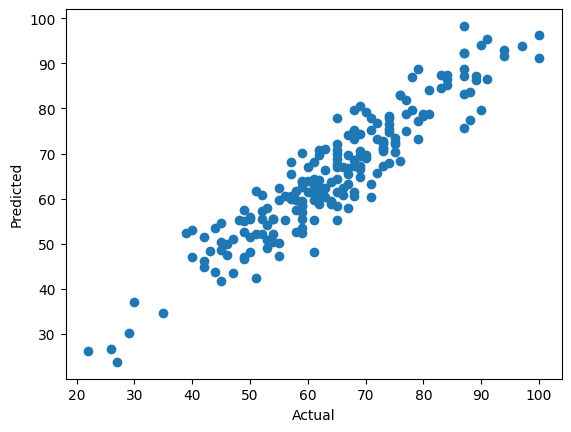

In [17]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

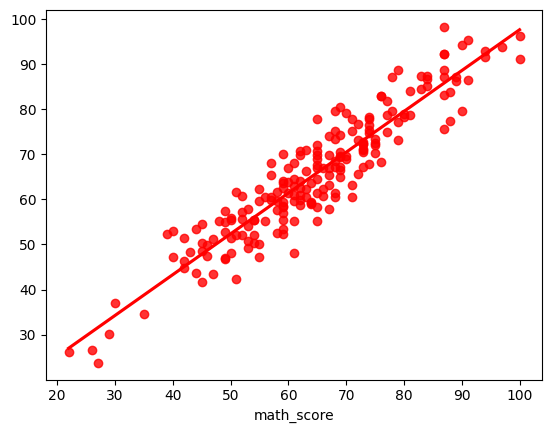

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### Difference between Actual and Predicted Values

In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
726,65,70.7500,-5.7500
243,59,58.6250,0.3750
342,69,64.8750,4.1250
976,60,61.3750,-1.3750
919,91,95.4375,-4.4375
...,...,...,...
458,100,96.1875,3.8125
169,67,57.8125,9.1875
297,71,77.8125,-6.8125
10,58,59.7500,-1.7500
